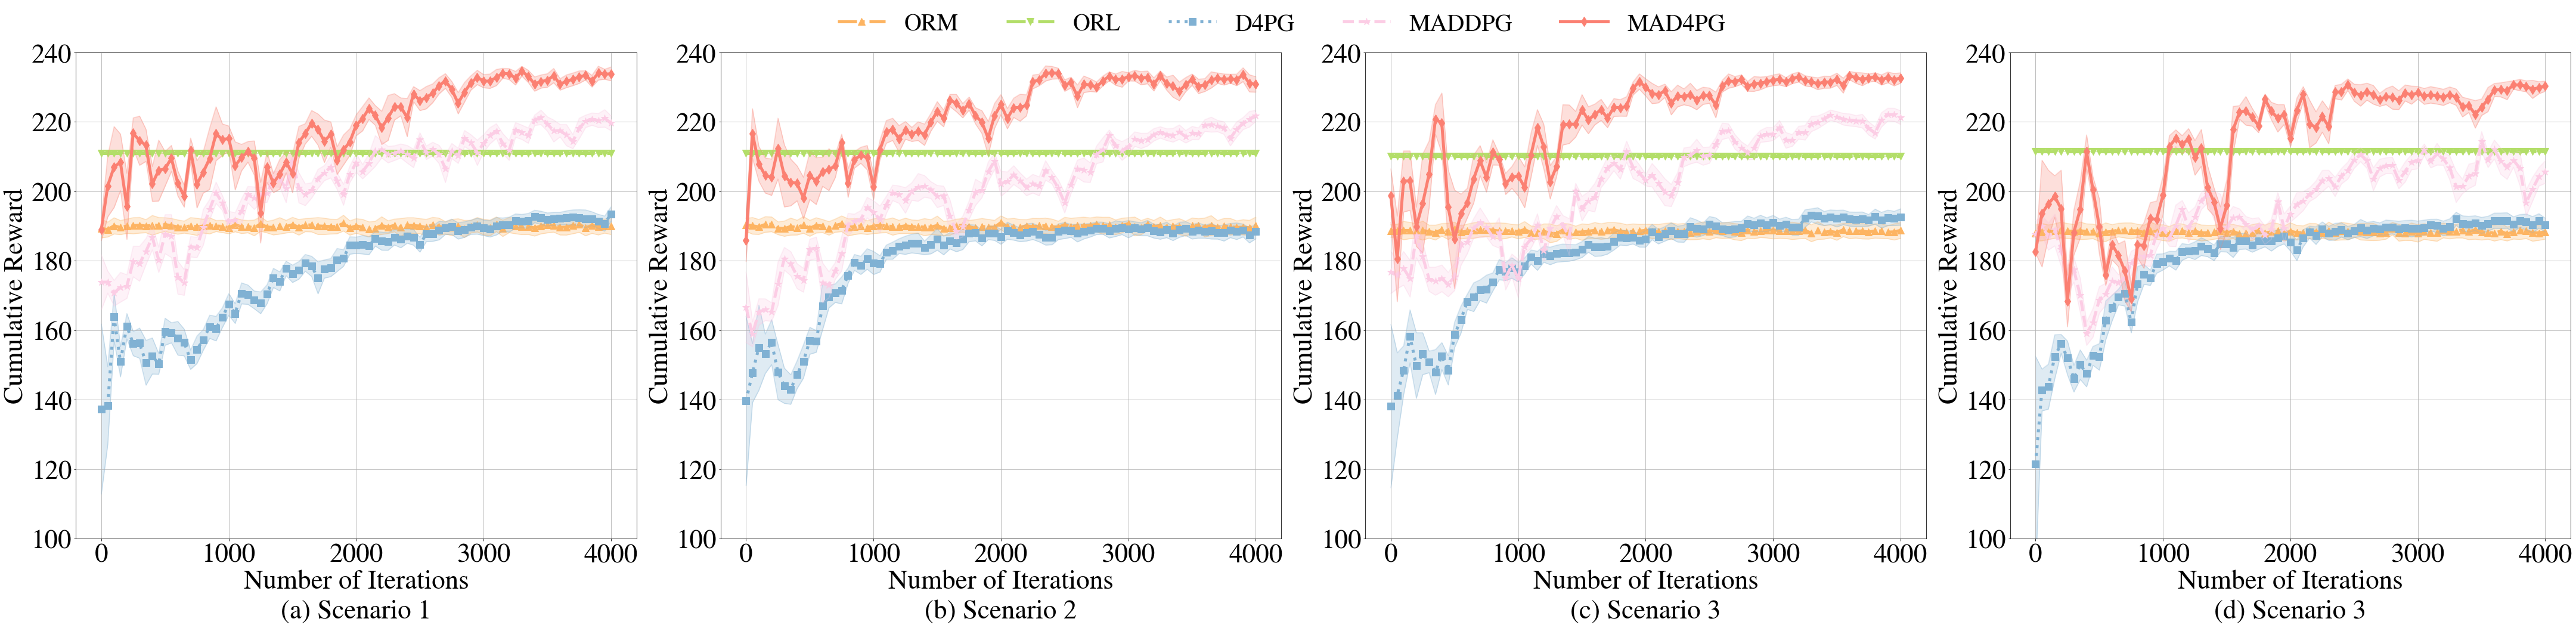

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import pandas as pd

import brewer2mpl
# brewer2mpl.print_maps()
# brewer2mpl.get_map args: set name set type number of colors
bmap = brewer2mpl.get_map('Set3', 'qualitative', 8)
colors = bmap.mpl_colors

colors = colors[3: 8]
# new_colors = ['seashell', 'honeydew', 'lightcyan']

def plot_and_fill(plt, edge_return, ranges, max_num, line_label, color, line_style, markers):
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = edge_return[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)

    result_at_a_range = edge_return[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)    
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    plt.plot(nex_x_vals, mean_results, color=color, label=line_label, linewidth=linewidth, ls=line_style, marker=markers, markersize=12)
    plt.plot(nex_x_vals, mean_plus_std, color=color, alpha=0.25)
    plt.plot(nex_x_vals, mean_minus_std, color=color, alpha=0.25)
    plt.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.25, color=color)

def get_return(episode_return):
    returns = np.zeros(shape=(len(episode_return), 10))
    for ret_index in range(episode_return.shape[0]):
        process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
        while "" in process_str:
            process_str.remove("")
        for index in range(len(process_str)):
            s = process_str[index]
            if process_str[index].endswith("\n"):
                s = s.replace("\n", "")
            f_s = float(s)
            returns[ret_index][index] = f_s
    return returns


fig_title = ['(a) Scenario 1', '(b) Scenario 2', '(c) Scenario 3', '(d) Scenario 3']

# colors = ['lightcoral', 'orange', 'lightgreen', 'cornflowerblue', 'darkviolet', 'seashell', 'honeydew', 'lightcyan']

font_size = 45
legend_size = 40
markersize = 20
plt.figure(figsize=(75, 15))            # 确定图像画布的大小
plt.rcParams['font.sans-serif'] = ['Nimbus Roman']  # 设置字体

x_label = 'Number of Iterations'
# MAD4PG
# scenario = 1
file_name1 = "/home/neardws/acme/3dd2da48-278e-11ed-abde-04d9f5632a58/"
# scenario = 2
file_name2 = "/home/neardws/acme/4d039f34-278e-11ed-987e-04d9f5632a58/"
# scenario = 3
file_name3 = "/home/neardws/acme/5d1d40a0-278e-11ed-b0cf-04d9f5632a58/"
# scenario = 4
file_name4 = "/home/neardws/acme/6c598dda-278e-11ed-ac11-04d9f5632a58/"

start_index = 0
returns_file_name1 = file_name1 + "logs/evaluator/logs.csv"
returns_file_name2 = file_name2 + "logs/evaluator/logs.csv"
returns_file_name3 = file_name3 + "logs/evaluator/logs.csv"
returns_file_name4 = file_name4 + "logs/evaluator/logs.csv"
names=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "local_rate", "offload_rate", "service_rate", "steps_per_second"]

ranges = 50
max_num = 4050
y_min = 0


returns_df1 = pd.read_csv(returns_file_name1, names=names, header=0)
episode_return1 = returns_df1["episode_return"].values
returns1 = get_return(episode_return1)

returns_df2 = pd.read_csv(returns_file_name2, names=names, header=0)
episode_return2 = returns_df2["episode_return"].values
returns2 = get_return(episode_return2)

returns_df3 = pd.read_csv(returns_file_name3, names=names, header=0)
episode_return3 = returns_df3["episode_return"].values
returns3 = get_return(episode_return3)
        
returns_df4 = pd.read_csv(returns_file_name4, names=names, header=0)
episode_return4 = returns_df4["episode_return"].values
returns4 = get_return(episode_return4)

start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return1.shape[0])]

mad4pg_return1 = returns1[start_index:end_index, 9].tolist()
mad4pg_return2 = returns2[start_index:end_index, 9].tolist()
mad4pg_return3 = returns3[start_index:end_index, 9].tolist()
mad4pg_return4 = returns4[start_index:end_index, 9].tolist()


# MADDPG
# scenario = 1
file_name1 = "/home/neardws/acme/201db7fe-4483-11ed-b9c8-04d9f5632a58/"
# scenario = 2
file_name2 = "/home/neardws/acme/4ad37556-4483-11ed-bb1b-04d9f5632a58/"
# scenario = 3
file_name3 = "/home/neardws/acme/2bb69ca2-4519-11ed-976c-04d9f5632a58/"
# scenario = 4
file_name4 = "/home/neardws/acme/4e327198-4519-11ed-8999-04d9f5632a58/"

name=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "episodes", "local_rate", "offload_rate", "service_rate", "steps", "steps_per_second"]

returns_file_name = file_name1 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
maddpg_return1 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name2 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
maddpg_return2 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name3 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
maddpg_return3 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name4 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
maddpg_return4 = returns[start_index:end_index, 9].tolist()


# D4PG
# scenario = 1
file_name1 = "/home/neardws/acme/d5d3b1d2-458e-11ed-aedb-04d9f5632a58/"
# scenario = 2
file_name2 = "/home/neardws/acme/fa5b2990-458e-11ed-a7ab-04d9f5632a58/"
# scenario = 3
file_name3 = "/home/neardws/acme/13486fe4-458f-11ed-b5aa-04d9f5632a58/"
# scenario = 4
file_name4 = "/home/neardws/acme/4c583ada-458f-11ed-a0ee-04d9f5632a58/"


returns_file_name = file_name1 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
d4pg_return1 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name2 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
d4pg_return2 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name3 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
d4pg_return3 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name4 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
d4pg_return4 = returns[start_index:end_index, 9].tolist()

# Edge
# scenario = 1
file_name1 = "/home/neardws/acme/47745bfa-4569-11ed-99de-04d9f5632a58/"
# scenario = 2
file_name2 = "/home/neardws/acme/6653303c-4569-11ed-b58d-04d9f5632a58/"
# scenario = 3
file_name3 = "/home/neardws/acme/7f79f24e-4569-11ed-af7b-04d9f5632a58/"
# scenario = 4
file_name4 = "/home/neardws/acme/9c9cbad2-4569-11ed-8f1f-04d9f5632a58/"


returns_file_name = file_name1 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
edge_return1 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name2 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
edge_return2 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name3 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
edge_return3 = returns[start_index:end_index, 9].tolist()

returns_file_name = file_name4 + "logs/environment_loop/logs.csv"
returns_df = pd.read_csv(returns_file_name, names=name, header=0)
episode_return = returns_df["episode_return"].values
returns = get_return(episode_return)
edge_return4 = returns[start_index:end_index, 9].tolist()

local_return1 = [210.8997425562052] * 4100
local_return2 = [210.86179027800534] * 4100
local_return3 = [210.0533057757515] * 4100
local_return4 = [211.50769716179911] * 4100


linewidth = 5.0

line_styles = ['-.', '-.', ':', '--', 'solid']
markers = ['^', 'v', 's', '*', 'd']


#################################################################### #################################################################
plt.subplot(1, 4, 1)                        # 将画布分为两列
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Cumulative Reward', fontsize=font_size)  
plt.title(fig_title[0], fontsize=font_size, y=-0.17)     # 图的title

plot_and_fill(plt, edge_return1, ranges, max_num, 'ORM', colors[2], line_styles[0], markers[0])
plot_and_fill(plt, local_return1, ranges, max_num, 'ORL', colors[3], line_styles[1], markers[1])
plot_and_fill(plt, d4pg_return1, ranges, max_num, 'D4PG', colors[1], line_styles[2], markers[2])
plot_and_fill(plt, maddpg_return1, ranges, max_num, 'MADDPG', colors[4], line_styles[3], markers[3])
plot_and_fill(plt, mad4pg_return1, ranges, max_num, 'MAD4PG', colors[0], line_styles[4], markers[4])

plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1000))
# plt.xlim(0, 4000)
plt.ylim(100, 240)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
# plt.legend(loc=0, fontsize = legend_size)  
# plt.show()

#################################################################### #################################################################
plt.subplot(1, 4, 2) 
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Cumulative Reward', fontsize=font_size)  
plt.title(fig_title[1], fontsize=font_size, y=-0.17)     # 图的title

plot_and_fill(plt, edge_return2, ranges, max_num, 'ORM', colors[2], line_styles[0], markers[0])
plot_and_fill(plt, local_return2, ranges, max_num, 'ORL', colors[3], line_styles[1], markers[1])
plot_and_fill(plt, d4pg_return2, ranges, max_num, 'D4PG', colors[1], line_styles[2], markers[2])
plot_and_fill(plt, maddpg_return2, ranges, max_num, 'MADDPG', colors[4], line_styles[3], markers[3])
plot_and_fill(plt, mad4pg_return2, ranges, max_num, 'MAD4PG', colors[0], line_styles[4], markers[4])

plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1000))
# plt.xlim(0, 4000)
plt.ylim(100, 240)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
# plt.legend(loc=0, fontsize = legend_size)  
# plt.show()
plt.legend(loc=9, fontsize = legend_size, c, ncol=5, borderaxespad = 0., frameon=False) 


#################################################################### #################################################################
plt.subplot(1, 4, 3) 
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Cumulative Reward', fontsize=font_size)  
plt.title(fig_title[2], fontsize=font_size, y=-0.17)     # 图的title

plot_and_fill(plt, edge_return3, ranges, max_num, 'ORM', colors[2], line_styles[0], markers[0])
plot_and_fill(plt, local_return3, ranges, max_num, 'ORL', colors[3], line_styles[1], markers[1])
plot_and_fill(plt, d4pg_return3, ranges, max_num, 'D4PG', colors[1], line_styles[2], markers[2])
plot_and_fill(plt, maddpg_return3, ranges, max_num, 'MADDPG', colors[4], line_styles[3], markers[3])
plot_and_fill(plt, mad4pg_return3, ranges, max_num, 'MAD4PG', colors[0], line_styles[4], markers[4])

plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1000))
# plt.xlim(0, 4000)
plt.ylim(100, 240)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
# plt.legend(loc=0, fontsize = legend_size)  
# plt.show()

#################################################################### #################################################################
plt.subplot(1, 4, 4) 
plt.xlabel(x_label, fontsize=font_size)                          # x轴的label
plt.ylabel('Cumulative Reward', fontsize=font_size)  
plt.title(fig_title[3], fontsize=font_size, y=-0.17)     # 图的title

plot_and_fill(plt, edge_return4, ranges, max_num, 'ORM', colors[2], line_styles[0], markers[0])
plot_and_fill(plt, local_return4, ranges, max_num, 'ORL', colors[3], line_styles[1], markers[1])
plot_and_fill(plt, d4pg_return4, ranges, max_num, 'D4PG', colors[1], line_styles[2], markers[2])
plot_and_fill(plt, maddpg_return4, ranges, max_num, 'MADDPG', colors[4], line_styles[3], markers[3])
plot_and_fill(plt, mad4pg_return4, ranges, max_num, 'MAD4PG', colors[0], line_styles[4], markers[4])

plt.grid()
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1000))
# plt.xlim(0, 4000)
plt.ylim(100, 240)                     # 设置y轴的取值范围，如设置（0,5）则y轴坐标为从0开始，到5结束
# 刻度值字体大小设置
plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
# plt.legend(loc=0, fontsize = legend_size)  
# plt.show()

# plt.savefig('different_bandwidth.png', dpi=50)
plt.subplots_adjust(wspace =0.15)#调整子图间距

plt.savefig("Fig-CR.pdf", bbox_inches='tight')
plt.show()
